In [8]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
     --------------------------------------- 0.0/11.1 MB 131.3 kB/s eta 0:01:25
     --------------------------------------- 0.0/11.1 MB 220.2 kB/s eta 0:00:51
     --------------------------------------- 0.0/11.1 MB 219.4 kB/s eta 0:00:51
     --------------------------------------- 0.1/11.1 MB 252.2 kB/s eta 0:00:44
     --------------------------------------- 0.1/11.1 MB 327.7 kB/s eta 0:00:34
      -------------------------------------- 0.2/11.1 MB 689.2 kB/s eta 0:00:16
     -- ------------------------------------- 0.6/11.1 MB 1.6 MB/s eta 0:00:07
     --- ------------------------------------ 0.9/11.1 MB 2.3 MB/s eta 0:00:05
     ---- ----------------------------------- 1.3/11.1 MB 3.0 MB/s eta 0:00:04
     ----- ---------------------------------- 1.6/11.1 MB 3.2 MB/s eta 0:00:04
     ------- -------------------------------- 2.1/11.1 MB 3.


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from sklearn.datasets import make_classification

In [146]:
X,y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0)

In [147]:
pd.DataFrame(X)[0]

0     -2.332869
1     -0.199840
2     -0.966914
3     -2.250768
4     -1.345005
         ...   
995   -1.630862
996    1.567075
997   -1.387641
998   -1.824861
999   -1.533633
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

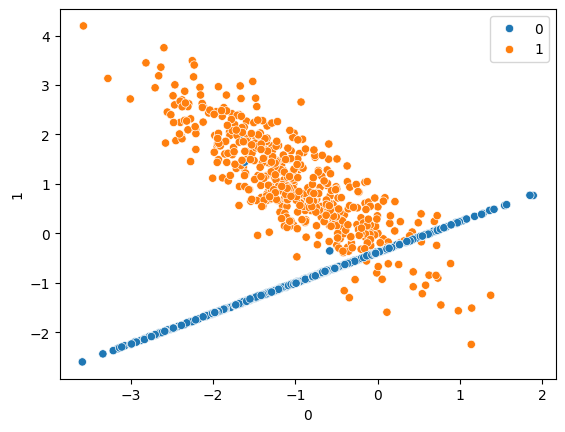

In [148]:
sns.scatterplot(x = pd.DataFrame(X)[0],y = pd.DataFrame(X)[1],hue = y)

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [151]:
svc = SVC(kernel='linear')

In [152]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [153]:
y_pred = svc.predict(X_test)

In [154]:
from sklearn.metrics import classification_report, confusion_matrix

In [155]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       116
           1       0.98      0.88      0.93       134

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

[[114   2]
 [ 16 118]]


In [156]:
from sklearn.model_selection import GridSearchCV

params = {
    'C' : [0.1,1,10,100,1000],
    'gamma' : [1,0.1,0.01,0.001,0.0001],
    'kernel' : ['rbf','poly','sigmoid']
}

In [157]:
grid = GridSearchCV(SVC(), param_grid=params, refit = True, cv=5, verbose = 3)

In [158]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.873 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.913 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.880 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.887 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.913 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.673 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

In [159]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [160]:
grid.best_score_

np.float64(0.984)

In [161]:
y_pred_grid = grid.predict(X_test)
print(classification_report(y_test,y_pred_grid))
print(confusion_matrix(y_test,y_pred_grid))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       116
           1       0.98      0.97      0.98       134

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

[[114   2]
 [  4 130]]


In [162]:
rbf = SVC(kernel='rbf')
rbf.fit(X_train,y_train)

y_pred_rbf = rbf.predict(X_test)
print(classification_report(y_test,y_pred_rbf))
print(confusion_matrix(y_test,y_pred_rbf))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       116
           1       0.98      0.90      0.94       134

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

[[114   2]
 [ 13 121]]


In [163]:
poly = SVC(kernel='poly')
poly.fit(X_train,y_train)

y_pred_poly = poly.predict(X_test)
print(classification_report(y_test,y_pred_poly))
print(confusion_matrix(y_test,y_pred_poly))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       116
           1       0.98      0.84      0.91       134

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.92      0.91      0.91       250

[[114   2]
 [ 21 113]]


In [164]:
sig = SVC(kernel='sigmoid')
sig.fit(X_train,y_train)

y_pred_sig = sig.predict(X_test)
print(classification_report(y_test,y_pred_sig))
print(confusion_matrix(y_test,y_pred_sig))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74       116
           1       0.77      0.76      0.77       134

    accuracy                           0.75       250
   macro avg       0.75      0.75      0.75       250
weighted avg       0.75      0.75      0.75       250

[[ 86  30]
 [ 32 102]]
